In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz
from DataManager.DataManager import DataManager

In [6]:
start = datetime.datetime(year=2019, month=1, day=1, hour=8).replace(tzinfo=pytz.utc).astimezone(pytz.timezone('US/Pacific'))
end = start + datetime.timedelta(hours=24)
window = "15m"
building = "avenal-animal-shelter"
zones = ["hvac_zone_shelter_corridor"]
DataManager = DataManager(building, zones, start, end, window)

actions = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

temperatures = [66, 67.36602078819418, 68.40355993620399, 68.53188021313338, 68.51347777073056, 68.482258536279, 68.51489386421778, 68.43784760265399, 68.32662575949962, 68.1736015543163, 68.13128493182188, 68.02550106504248, 69.11795492805898, 69.22141357990226, 69.21126601890339, 69.13966760866747, 69.02357859237615, 68.96835107623149, 68.86710250535755, 68.72448132373349, 68.66704200566505, 68.5230191392059, 68.41099750847519, 68.34653665671189, 68.2661352222868, 68.1760328646954, 68.14004453484199, 68.1014911769676, 68.04541474703295, 68.05462283092777, 67.97298027969363, 69.05663612154999, 69.23092299091259, 69.18632892222055, 69.07556023397728, 68.98687176825719, 68.97684562039913, 68.96517232874655, 69.02029090249552, 69.0593559920936, 69.08234454050667, 69.1002019238281, 69.09221911111659, 69.08871927886862, 69.06464196977548, 69.1167828771851, 69.16059283789026, 69.19466290634497, 69.23900034151181, 69.28960764759458, 69.21276559824918, 69.19182271000182, 69.22948202949402, 69.31721924579139, 69.40467796450915, 69.47628557473429, 69.48723739062021, 69.46602390513998, 69.44177053174965, 69.3275753841523, 69.29209300802016, 69.3266324112696, 69.40830852580369, 69.40844782303807, 69.4644898365955, 69.50028947287944, 69.61372848540412, 69.72409488548497, 69.70682256900315, 69.6254094188698, 69.58172704223853, 69.51212302294667, 69.54874117661622, 69.59843623444023, 69.55265401488349, 69.60129326278513, 69.61201897929493, 69.59895760120456, 69.49555373532935, 69.47993073389564, 69.53879599180628, 69.53583916061243, 69.5653876604778, 69.59942421872688, 69.60518018072958, 69.62096715637307, 69.70308631855437, 69.67964687417992, 69.66802770459103, 69.63085341648403, 69.6697735108346, 69.64699865470897, 69.56839695218768, 69.50074528922065, 69.51271126866898, 69.50406684997722, 69.47017257738256]




In [21]:
len(DataManager.do_not_exceed[zones[0]].values[:-1, 1])

95

In [60]:
times = pd.date_range(start, end, freq="15T")[:-1]
df = pd.DataFrame(index = times, data ={"IAT": temperatures[:-1], "heating" : actions,
                                       "occupancy": DataManager.occupancy[zones[0]].values[:],
                                       "DNE_top": DataManager.do_not_exceed[zones[0]].values[:, 0],
                                       "DNE_bottom": DataManager.do_not_exceed[zones[0]].values[:, 1],
                                       "OAT": DataManager.outdoor_temperature.values[:-1]})
df["time"] = times


In [61]:
df = df.loc[start: start + datetime.timedelta(hours=9)]

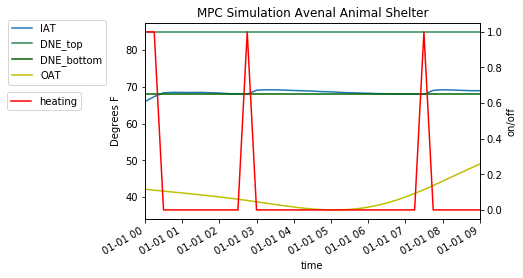

<Figure size 1800x1200 with 0 Axes>

In [107]:
ax = df.plot(x="time", y="IAT", legend=False)
ax.set_ylabel('Degrees F')

ax2 = ax.twinx()
ax2.set_ylabel("on/off")

df.plot(x="time", y="heating", ax=ax2, legend=False, color="r")
df.plot(x="time", y="DNE_top", ax=ax, legend=False, color="seagreen")
df.plot(x="time", y="DNE_bottom", ax=ax, legend=False, color="darkgreen")
df.plot(x="time", y="OAT", ax=ax, legend=False, color="y")

ax.legend(loc='right', bbox_to_anchor=(-0.1, 0.85), shadow=False, ncol=1)
ax2.legend(loc='right', bbox_to_anchor=(-0.175, 0.6), shadow=False, ncol=1)

plt.title("MPC Simulation Avenal Animal Shelter")
plt.savefig("./SimFig", dpi=300, bbox_inches="tight")
plt.figure(dpi=300)
plt.show()


In [35]:
ax